<a href="https://colab.research.google.com/github/clunckyboy/Prediksi-Tingkat-Stress-Decision-Tree-Classifier/blob/main/Prediksi_tingkat_stress_pada_mahasiswa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediksi Tingkat Stress Mahasiswa

**Nama nama anggota** : <br>
Edwin Jonatan Purba 			(231401091) <br>
Luthfi Zahran Panggabean             	(231401082) <br>
Susena Yudha Wijaya                       	(231401109) <br>
Michael Valent Satrio Munthe       	(231401103) <br>
Josh Peter Pardosi 			(231401031)


Dataset dapat di lihat pada link berikut
https://www.kaggle.com/datasets/susanta21/student-attitude-and-behavior

data tersebut memiliki 235 record, dan dari data tersebut, kami akan memprediksi tingkat stress mahasiswa menggunakan 6 variabel yaitu :

###**daily studying time : 6 kategori**
0. 0-30 Minute
1. 1-2 hour
2. 2-3 hour
3. 3-4 Hour
4. 30-60 minute
5. More than 4 Hour

###**Do you like your degree? : 2 kategori**
0. no
1. yes

###**social media time : 6 kategori**
0. 0 minute
1. 1-30 minute
2. 1-1.30 hour
3. 1.30-2 hour
4. 30-60 minute
5. more than two hour

###**Travelling Time: 7 kategori**
0. 0-30 minute
1. 1-1.30 Hour
2. 1.30-2 Hour
3. 2-2.30 hour
4. 2.30-3 Hour
5. 30-60 minute
6. more than 3 hour

###**Financial Status : 4 kategori**
0. awful
1. bad
2. fabulous
3. good

###**part-time job : 2 kategori**
0. no
1. yes

Variabel terikat atau variabel yang akan di prediksi adalah **stress level** dengan 4 kategori, yaitu
0. awful
1. bad
2. fabulous
3. good

Langkah pertama adalah mengimport library dan dependencies terlebih dahulu

In [ ]:
import pandas as pd
import joblib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

Library Pandas berfungsi untuk memanipulasi dan menganalisi data. Ada fitur Data Frame juga untuk mengolah dan menganalisis data tabular. Pada projek ini, pandas digunakan untuk membaca data dari file dataset csv.

Library sklearn.model_selection.train_test_split digunakan untuk membaggi dataset menjadi subset pelatihan dan pengujian pada data yang belum pernah di lihat sebeulumnya.

Karena variabel bebas kami memakai data kategorikal maka kami akan mengubahnnya menjadi data numerik menggunakan label encoder yang juga berasal dari scikit-learn. Banyak algoritma machine learning bekerja lebih baik dengan data numerik, sehingga Label Encoding diperlukan untuk data kategorikal.

Kami juga mengimport fungsi DecisionTreeClassifier untuk mengimplementasikan algoritma decision tree untuk klasifikasi. Fungs ini akan digunakan untuk membangun model prediktif untuk tingkat stress mahasiswa

Fungsi classification_report dan accuracy_score digunakan untuk mengevaluasi kinerja model klasifikasi.

GridSearchCV digunakan untuk menemukan kombinasi nilai parameter (hyperparameter) terbaik untuk model untuk menghasilkan performa terbaik pada model. Dengan kata lain, GridSearchCV membantu mengotomatiskan proses pencarian kombinasi hyperparameter terbaik, sehingga tidak perlu mencobanya secara manual satu per satu.

cross_val_score digunakan untuk menggenralisasi data yang belum pernah di lihat oleh model sehingga dapat menguatkan performa dari model

Lalu, kami akan mencoba untuk menampilkan informasi dari dataset tersebut

In [ ]:
data = pd.read_csv('/content/Student Attitude and Behavior.csv')
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Certification Course                                  235 non-null    object 
 1   Gender                                                235 non-null    object 
 2   Department                                            235 non-null    object 
 3   Height(CM)                                            235 non-null    float64
 4   Weight(KG)                                            235 non-null    float64
 5   10th Mark                                             235 non-null    float64
 6   12th Mark                                             235 non-null    float64
 7   college mark                                          235 non-null    float64
 8   hobbies                                               235 no

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studying time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social media time,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


Berdasarkan data tersebut, kami akan memprediksi tingkat stress menggunakan variabel waktu belajar sehari hari, menyukai jurusannya atau tidak, berapa lama dia bermain sosial media, waktu travelling dia ke kampus, status finansial, dan kerja paruh waktu atau tidak




In [ ]:
selected_variable = [
      "daily studying time",
      "Do you like your degree?",
      "social media time",
      "Travelling Time",
      "Financial Status",
      "part-time job",
      "Stress Level"
      ]

data = data[selected_variable]

,daily studying time,Do you like your degree?,social media time,Travelling Time,Financial Status,part-time job,Stress Level
0,0 - 30 minute,No,1.30 - 2 hour,30 - 60 minutes,Bad,No,Bad
1,30 - 60 minute,Yes,1 - 1.30 hour,0 - 30 minutes,Bad,No,Bad
2,1 - 2 Hour,Yes,More than 2 hour,30 - 60 minutes,Bad,No,Awful
3,1 - 2 Hour,No,1.30 - 2 hour,0 - 30 minutes,good,No,Bad
4,30 - 60 minute,Yes,1.30 - 2 hour,30 - 60 minutes,good,No,Good
...,...,...,...,...,...,...,...
230,30 - 60 minute,Yes,More than 2 hour,30 - 60 minutes,Bad,No,Bad
231,2 - 3 hour,Yes,30 - 60 Minute,30 - 60 minutes,good,No,Good
232,30 - 60 minute,Yes,30 - 60 Minute,2.30 - 3 hour,good,No,Bad
233,0 - 30 minute,Yes,More than 2 hour,2.30 - 3 hour,good,No,Awful


lalu, kami akan melakukan preprocessing data terlebih dahulu menggunakan label encoding, yaitu mengubah data kategorikal menjadi nilai numerik. Contohnya Kolom seperti Do you like your degree? dengan nilai "Yes" dan "No" akan diubah menjadi 1 dan 0.

In [ ]:
encoder = LabelEncoder()

for col in data.columns:
    data[col] = encoder.fit_transform(data[col].astype(str))

Selanjutnya, memisahkan fitur (X) yang berisi kolom kolom variabel bebas dan target (y) yang berisi kolom variabel terikat atau variabel yang akan kita prediksi yaitu stess level.

In [ ]:
X = data.drop("Stress Level", axis=1)
y = data["Stress Level"]
print(X.head())
print(y.head())

   daily studying time  Do you like your degree?  social media time  \
0                    0                         0                  3   
1                    4                         1                  1   
2                    1                         1                  5   
3                    1                         0                  3   
4                    4                         1                  3   

   Travelling Time  Financial Status  part-time job  
0                5                 1              0  
1                0                 1              0  
2                5                 1              0  
3                0                 3              0  
4                5                 3              0  
0    1
1    1
2    0
3    1
4    2
Name: Stress Level, dtype: int64


Langkah berikutnya adalah membagi data menjadi data pelatihan dan pengujian, lalu melatih model klasifikasi.

In [ ]:
# -- Membagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# -- Melatih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# -- Prediksi pada data pengujian
y_pred = model.predict(X_test)

# -- Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)
print(report)

0.40425531914893614
              precision    recall  f1-score   support

           0       0.12      0.33      0.18         3
           1       0.23      0.25      0.24        12
           2       0.64      0.50      0.56        28
           3       0.25      0.25      0.25         4

    accuracy                           0.40        47
   macro avg       0.31      0.33      0.31        47
weighted avg       0.47      0.40      0.43        47



Selanjutnya adalah meningkatkan kinerja model Decision Tree dengan hyperparameter tuning

In [ ]:
# -- Mendefinisikan parameter yang akan di-tune
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# -- Menginisialisasi model Decision Tree
model = DecisionTreeClassifier(random_state=42)

# -- Melakukan Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)  # Pastikan X_train dan y_train sudah terdefinisi

# -- Model terbaik yang akan disimpan
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# -- Evaluasi model terbaik pada data pengujian
y_pred_best = best_model.predict(X_test)  # Pastikan X_test sudah terdefinisi
print("Accuracy with Best Model:", accuracy_score(y_test, y_pred_best))  # Pastikan y_test sudah terdefinisi
print(classification_report(y_test, y_pred_best, zero_division=0))

best_model


Best Parameters: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Accuracy with Best Model: 0.5957446808510638
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        12
           2       0.61      1.00      0.76        28
           3       0.00      0.00      0.00         4

    accuracy                           0.60        47
   macro avg       0.15      0.25      0.19        47
weighted avg       0.36      0.60      0.45        47



DecisionTreeClassifier(max_depth=3, random_state=42)

Kode di atas mengotomatiskan proses pencarian pengaturan optimal untuk model Decision Tree, dengan tujuan mencapai akurasi prediktif terbaik dalam memprediksi tingkat stres mahasiswa. Melalui tuning hyperparameter, diharapkan model dapat menghasilkan prediksi yang lebih akurat dan handal.





selanjutnya kami akan memvisualisasikan variabel/fitur yang paling berpengaruh menentukan tingkat stress mahasiswa

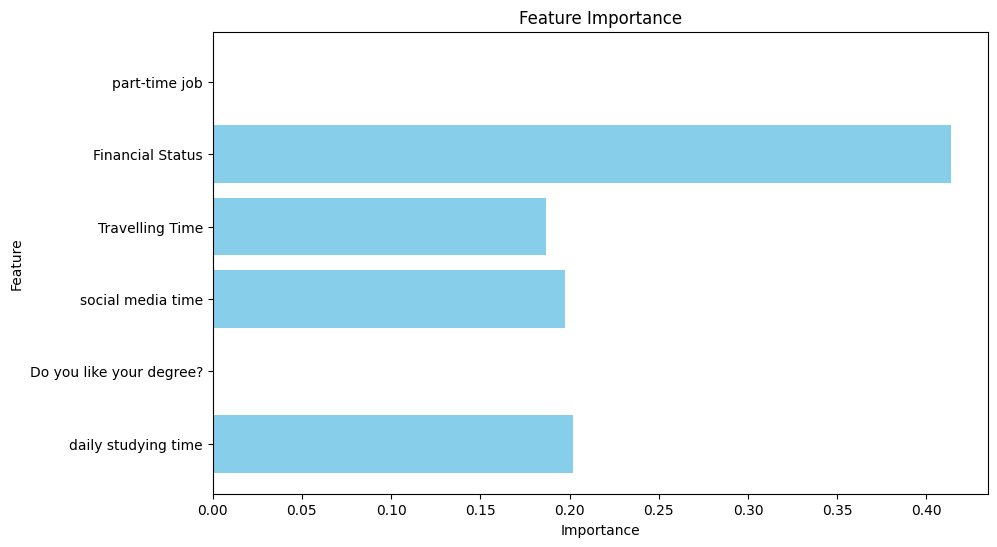

In [ ]:
# -- Mengambil feature importances dari model terbaik
feature_importances = best_model.feature_importances_
feature_names = X.columns

# -- Membuat visualisasi
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances, color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

Selanjutnya adalah menyimpan model ini menggunakan joblib dengan nama "stress_model.pkl"

In [ ]:
# -- Simpan model
joblib.dump(best_model, 'stress_model.pkl')

['stress_model.pkl']

# Cara menggunakan program

Cara menjalankan programnya adalah menginput berurutan sebuah nilai menggunakan label ke dalam fungsi  seperti berikut :
1. daily studying time
    - 0 = 0-30 menit
    - 1 = 1-2 jam
    - 3 = 3-4 jam
    - 4 = 30-60 menit
    - 5 = lebih dari 4 jam
2. do you like your degree
    - 0 = no
    - 1 = yes
3. social media time
    - 0 = 0 menit
    - 1 = 1-30 menit
    - 2 = 1-1.30 hour
    - 3 = 1.30-2 hour
    - 4 = 30-60 minute
    - 5 = lebih dari 2 jam
4. Travelling time
    - 0 = 0-30 minute
    - 1 = 1-1.30 Hour
    - 2 = 1.30-2 Hour
    - 3 = 2-2.30 hour
    - 4 = 2.30-3 Hour
    - 5 = 30-60 minute
    - 6 = more than 3 hour
5. Financial Status
    - 0 = awful
    - 1 = bad
    - 2 = fabulous
    - 3 = good
6. Part-time job
    - 0 = no
    - 1 = yes

setelah di run, maka program akan menghasilkan output prediksi tingkat stress dengan label sebagai berikut <br>
    - 0 = awful <br>
    - 1 = bad <br>
    - 2 = fabulous <br>
    - 3 = good <br>

In [ ]:
# -- Load model
model = joblib.load('stress_model.pkl')

# Data input baru
a = int(input("Masukkan daily studying time : "))
b = int(input("Masukkan do you like your degree? : "))
c = int(input("Masukkan social media time : "))
d = int(input("Masukkan Travelling Time : "))
e = int(input("Masukkan Financial Status : "))
f = int(input("Masukkan part-time job : "))
input_data = [[a, b, c, d, e, f]]
prediction = model.predict(input_data)
print("Predicted Stress Level:", prediction[0])

Masukkan daily studying time : 5
Masukkan do you like your degree? : 0
Masukkan social media time : 5
Masukkan Travelling Time : 6
Masukkan Financial Status : 0
Masukkan part-time job : 1
Predicted Stress Level: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
